# 6.5 ハイパーパラメータの検証

In [1]:
# coding: utf-8
import sys, os
from pathlib import Path
sys.path.append(os.path.join(os.path.join(os.path.join(Path().resolve(), '..'), '..'), '..'))  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.presentation.mnist import load_mnist
from common.presentation.multi_layer_net import MultiLayerNet
from common.presentation.util import shuffle_dataset
from common.presentation.trainer import Trainer

データのロードとデータ削減

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

ハイパーパラメータ検証のためのデータ分割

In [3]:
# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate) #今回は500*0.2=100
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_learn = x_train[validation_num:]
t_learn = t_train[validation_num:]

In [4]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    """全結合による多層ニューラルネットワーク

    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    weight_decay_lambda : Weight Decay（L2ノルム）の強さ
    """
    
    trainer = Trainer(network, x_learn, t_learn, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    """ニューラルネットの訓練を行うクラス
    """
    
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list #検証データの正解率と学習データの正解率を返す

In [5]:
# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.07 | lr:4.2362039082410024e-06, weight decay:5.954211594880394e-07
val acc:0.05 | lr:2.0956510492141184e-06, weight decay:2.067958715732382e-06
val acc:0.16 | lr:0.0004221780596870849, weight decay:8.919608566502717e-08
val acc:0.27 | lr:0.0016133511259444383, weight decay:2.5267079630324795e-08
val acc:0.11 | lr:1.084095902827479e-06, weight decay:5.3151115110461554e-05
val acc:0.09 | lr:1.3217204512296727e-06, weight decay:9.426886336333054e-07
val acc:0.13 | lr:0.00015052085557374132, weight decay:2.305721036192828e-05
val acc:0.11 | lr:1.4504895711393855e-05, weight decay:2.4776600781245785e-05
val acc:0.07 | lr:9.367207815433748e-06, weight decay:1.4175906186169674e-06
val acc:0.09 | lr:0.00040602593404712737, weight decay:2.2314789795607543e-06
val acc:0.72 | lr:0.006363192101083231, weight decay:2.4447720886844855e-07
val acc:0.14 | lr:1.134878773370517e-05, weight decay:2.062760516562873e-08
val acc:0.08 | lr:2.7029106176565642e-05, weight decay:2.094846863464015e-06


=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.81) | lr:0.009444391686171146, weight decay:7.47438856743551e-08
Best-2(val acc:0.77) | lr:0.007990191118536463, weight decay:1.300526266035865e-08
Best-3(val acc:0.76) | lr:0.007331578496431657, weight decay:4.0944897613462514e-07
Best-4(val acc:0.74) | lr:0.006375278903804899, weight decay:5.11712877584643e-06
Best-5(val acc:0.72) | lr:0.006363192101083231, weight decay:2.4447720886844855e-07
Best-6(val acc:0.72) | lr:0.00784693329413135, weight decay:2.848981135975005e-07
Best-7(val acc:0.72) | lr:0.004735264597544366, weight decay:1.8698358393705094e-08
Best-8(val acc:0.7) | lr:0.005893548142174681, weight decay:6.814400820289557e-05
Best-9(val acc:0.7) | lr:0.005709548955798427, weight decay:1.2615668175535632e-08
Best-10(val acc:0.69) | lr:0.007356229527681789, weight decay:1.919352895855701e-07
Best-11(val acc:0.66) | lr:0.005401235364599082, weight decay:6.113411618238651e-06
Best-12(val acc:0.54) | lr

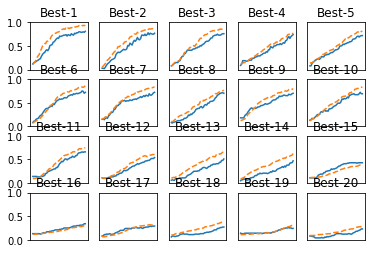

In [6]:
# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()


学習率が0.001から0.01、weight decayが$10^{-8}$から$10^{-6}$のとき学習がうまくいっている

In [7]:
# ハイパーパラメータを再度調整
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -6) # 10^(-8)から10^(-6)
    lr = 10 ** np.random.uniform(-3, -2) # 0.001から0.01
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.41 | lr:0.0029052508767463984, weight decay:3.0016337696072084e-07
val acc:0.62 | lr:0.00493234404436621, weight decay:5.502352568019017e-07
val acc:0.31 | lr:0.002499107417700084, weight decay:2.3083944981067976e-08
val acc:0.43 | lr:0.0025296338282221617, weight decay:6.606616459059713e-07
val acc:0.79 | lr:0.009177206748522864, weight decay:7.731711971472413e-07
val acc:0.2 | lr:0.0011610933111345528, weight decay:2.796162491725706e-08
val acc:0.36 | lr:0.0018235838047589601, weight decay:7.040063772579681e-08
val acc:0.19 | lr:0.0010095678734676015, weight decay:1.915136829160306e-07
val acc:0.23 | lr:0.0015765657805951916, weight decay:4.048717626792804e-07
val acc:0.68 | lr:0.004195858130729968, weight decay:4.439313884192513e-07
val acc:0.48 | lr:0.00335051805105689, weight decay:2.5920264956611015e-07
val acc:0.28 | lr:0.0018218320287337534, weight decay:9.160449950388485e-08
val acc:0.15 | lr:0.0013472835632223062, weight decay:6.41265889115589e-07
val acc:0.21 | lr:

=========== Hyper-Parameter Optimization Result ===========
Best-1(val acc:0.83) | lr:0.009390113647451327, weight decay:1.323245161620208e-07
Best-2(val acc:0.8) | lr:0.007900225037484419, weight decay:9.435820601997639e-07
Best-3(val acc:0.8) | lr:0.009674202211301256, weight decay:1.596621236240483e-07
Best-4(val acc:0.79) | lr:0.009177206748522864, weight decay:7.731711971472413e-07
Best-5(val acc:0.78) | lr:0.009306025537061781, weight decay:1.7310951091611367e-08
Best-6(val acc:0.77) | lr:0.007606328425624906, weight decay:2.470392653982258e-08
Best-7(val acc:0.76) | lr:0.0067079055596371145, weight decay:5.97740834623752e-07
Best-8(val acc:0.76) | lr:0.006929322443388458, weight decay:4.2103640893351947e-07
Best-9(val acc:0.75) | lr:0.006384782845083323, weight decay:8.6374465404731e-08
Best-10(val acc:0.74) | lr:0.00536516195839043, weight decay:5.3448313838091906e-08
Best-11(val acc:0.74) | lr:0.009081440145448304, weight decay:1.6022364398282303e-08
Best-12(val acc:0.74) | lr

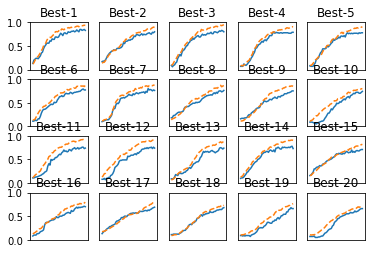

In [8]:
# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

Bestの場合をテストデータで検証

In [9]:
def __test(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
        
    trainer = Trainer(network, x_train, t_train, x_test, t_test,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    # 学習データと検証データを合わせたtrainデータで学習し、テストデータで検証
    
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list #検証データの正解率と学習データの正解率を返す

In [10]:
# ベストのときのweight decayと学習率を指定
weight_decay = 1.323 * 10 ** (-7)
lr = 9.390 * 10 ** (-3)

test_acc_list, train_acc_list = __test(lr, weight_decay)
print("test acc:" + str(test_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))

test acc:0.7756 | lr:0.00939, weight decay:1.323e-07
